In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io as sk
import glob as gb

# from __future__ import print_function
from skimage.feature import peak_local_max
# from skimage.morphology import watershed
from scipy import ndimage
from PIL import Image
# from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
import segmentation_models as sm

Using TensorFlow backend.


ImportError: cannot import name 'DenseNet121'

In [2]:
def show(img):
  plt.imshow(img)
  plt.show()

In [24]:
root_directory = '/home/bwkim/융복합공동연구/선별데이터/'
image_dataset = []
image_train={}  

files=gb.glob(root_directory+'*.jpg') 
for file in files :
    image_train[file] = cv2.imread(file, 1)

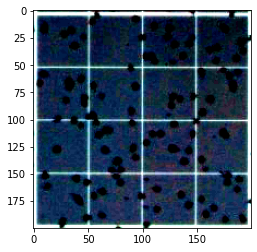

(200, 200, 3)


In [37]:
img1=image_train[file].copy()
img = np.clip((1+10.0) * img1 - 128 * 10.0, 0, 255).astype(np.uint8)
show(img)
print(img.shape)

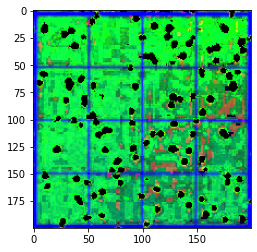

In [38]:
#converting to HSV color model
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv)

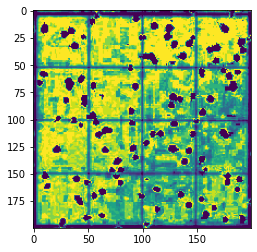

In [39]:
h, s, v = cv2.split(hsv)
show(s)

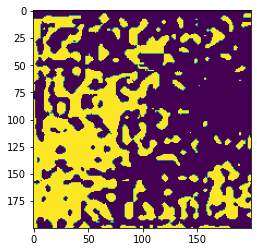

In [40]:
blur = cv2.medianBlur(thr, 5)
show(blur)

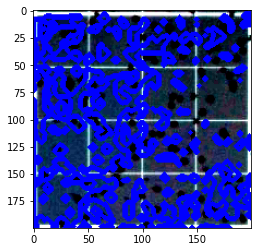

number of lemons found including error =  98


In [41]:
copy1 = img.copy()
contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(copy1, contours, -1, (0,0,255), 3)
show(copy1)
print("number of lemons found including error = ", len(contours))

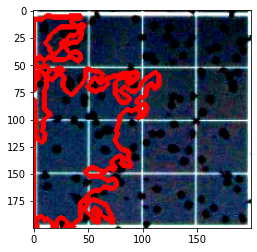

number of lemons found via contour detection =  1


In [42]:
# arbitarily removing patches having area greater than 1000
copy2 = img.copy()
count = []
for x in contours:
    area = cv2.contourArea(x)
    if area > 1000 :
        count.append(x)
cv2.drawContours(copy2, count, -1, (255,0,0), 3)
show(copy2)
print("number of lemons found via contour detection = ", len(count))

In [34]:
copy3 = img.copy()
D = ndimage.distance_transform_edt(thr)
localMax = peak_local_max(D, indices=False, min_distance=40,
	labels=thr)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thr)
ws = len(np.unique(labels)) -1
copy3[labels == -1] = [255,0,0]
print("no. of lemons found via watershed algorithm = ", ws)

no. of lemons found via watershed algorithm =  1


/home/bwkim/anaconda3/envs/kepri/lib/python3.6/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


number of lemon segments detected =  1


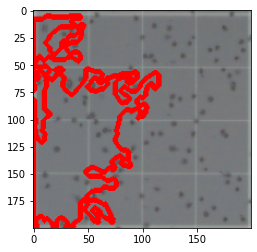

In [35]:

ans = int((len(count) + len(np.unique(labels)) -1) / 2)
print("number of lemon segments detected = ", ans)
show(copy2)